In [59]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import datetime

In [3]:
# downlad a page and print out some content of it
url = 'https://coronavirus.health.ny.gov/county-county-breakdown-positive-cases'
page = get(url)
print(page.text[:500])


<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
  <head>
    <meta charset="utf-8" /><script type="text/javascript">(window.NREUM||


In [106]:
# output 2xx means that the downlad was successful
# outputs starting with 4 or 4 indicates error
page.status_code

200

In [104]:
# printing out some content using `content`
page.content[:500]

bytes

In [103]:
# parsing the page with bs
soup = BeautifulSoup(page.content, 'html.parser')
# soup
print(soup.prettify()) # this supposed to be pretty print but doesn't seem like it

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).loader_config={licenseKey:"a873d11659",applicationID:"626833103"};window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var i=n[t]={exports:{}};e[t][0].call(i.exports,function(n){var i=e[t][1][n];return r(i||n)},i,i.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<t.length;i++)r(t[i]);return r}({1:[function(e,n,t){function r(){}function i(e,n,t){return function(){return o(e,[u.now()].concat(f(arguments)),n?nul

In [26]:
# children returns a list generator, so we need to call the list function on it 
list(soup.children)

['\n',
 'html',
 '\n',
 <html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
 <meta charset="utf-8"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"a873d11659",applicationID:"626833103"};window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var i=n[t]={exports:{}};e[t][0].call(i.exports,function(n){var i=e[t][1][n];return r(i||n)},i,i.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<t.length;i++)r(t[i]);return r}({1:[function(e,n,t){function r(){}function i(e,n,t){return function(){return o(e,[u.now()].concat(f(arguments)),n?nul

In [27]:
# listing the types of elements on the page
# the most important is Tag
[type(item) for item in list(soup.children)] 

[bs4.element.NavigableString,
 bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [65]:
# We can now select the html tag and its children by taking the 
# 4th item in the list (the .Tag):
html = list(soup.children)[3]
list1 = list(html.children)
list1[3] # this is part of the body

<body class="body-sidebars-none">
<div class="nygov-logo">
<img alt="nygov-logo" src="/profiles/custom/webny/themes/custom/webny_theme/images/nygov-logo.png"/>
</div>
<a class="visually-hidden focusable skip-to-main" href="#main-content">
      Skip to main content
    </a>
<div class="nygov-universal-container" data-iframe="true" data-updated="2014-11-07 08:30" id="nygov-universal-navigation">
<noscript>
<iframe frameborder="0" height="86px" scrolling="no" src="//static-assets.ny.gov/load_global_menu/ajax?iframe=true" style="border:none; overflow:hidden; width:100%; height:86px;" width="100%">
            Your browser does not support iFrames
        </iframe>
</noscript>
<script type="text/javascript">
        var _NY = {
            HOST: "static-assets.ny.gov",
            BASE_HOST: "www.ny.gov",
            hideSettings: false,
            hideSearch: false
        };
        (function (document, bundle, head) {
            head = document.getElementsByTagName('head')[0];
       

In [66]:
body = list(html.children)[3]
list2 = list(body.children)
list2[3]

<a class="visually-hidden focusable skip-to-main" href="#main-content">
      Skip to main content
    </a>

#### Finding stuff based on classes

In [102]:
updateDate = soup.find('div', attrs={'class':'wysiwyg--field-webny-wysiwyg-title'}).text
(text, date) = updateDate.split(': ')
print(text)
print(date)
date0 = datetime.datetime.strptime(date, '%B %d, %Y | %I:%M%p')
print(date0)
dateStr = datetime.datetime.strftime(date0, '%Y_%m_%d__%H_%M')
dateStr

# see above
# (date1, time)=date.split(' | ')
# print(date1, time)
# date3 = datetime.datetime.strptime(date1, '%B %d, %Y')
# time2 = datetime.datetime.strptime(time, '%I:%M%p')
# print(date3)
# print(time2)

Last Update
March 26, 2020 | 1:49PM
2020-03-26 13:49:00


'2020_03_26__13_49'

#### Strategy2

In [9]:
# using `find_all` method to list all of the tags
# soup = BeautifulSoup(page.content, 'html.parser')

tables = soup.find_all('table')
type(tables)

bs4.element.ResultSet

In [12]:
# prepping dataframe by convering `tables` to list 
# cool factor: reading bs4 ResultSet with Pandas
# https://pythonprogramminglanguage.com/web-scraping-with-pandas-and-beautifulsoup/

tablelist = pd.read_html(str(tables))

In [13]:
# so the rsulting object is a list
print(type(tablelist))

#and its first element is a df
print(type(tablelist[0]))

tablelist[0].head()

# interestingly there is no more elements...?

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,County,Positive Cases
0,Albany,171
1,Allegany,2
2,Broome,16
3,Cayuga,2
4,Chautauqua,1


In [16]:
tablelist[0].to_csv('Last_Update_March_26_2020_1_49PM.csv')

In [46]:
df = tablelist[0]
print(df.head())
print(df.tail())

       County  Positive Cases
0      Albany             152
1    Allegany               2
2      Broome              11
3      Cayuga               2
4  Chautauqua               1
                            County  Positive Cases
49                      Washington               4
50                           Wayne               7
51                     Westchester            4691
52                         Wyoming               4
53  Total Number of Positive Cases           30811


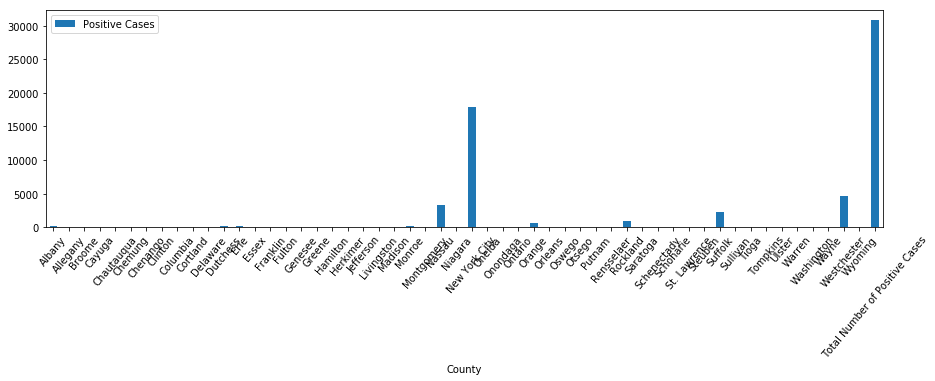

In [60]:
df.plot(x='County', y='Positive Cases', kind='bar', figsize=(15,4), rot=50)

In [61]:
# let's take away the last row
df2 = df[:-1]
df2.tail()

,County,Positive Cases
48,Warren,2
49,Washington,4
50,Wayne,7
51,Westchester,4691
52,Wyoming,4
